<a href="https://colab.research.google.com/github/CyJavac/CIENCIA_DATOS_2025/blob/main/Clase_3_FCiencia_datos_Medidas_de_tendencia_central.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Features = Columnas

Tipo de Features

Datos atipicos = outliers

Registros = Filas

Dataframe = Tabla de datos


#Estimación y Metricas
##Media
###Media (mean):
Suma de todos los valores entre la cantidad de valores. Sensible a los datos.

###Media truncada (trimmed mean)
Se ignora un numero fijo de valres ordenados y se calcula el promedio de los restantes.

###Media ponderada (weighted mean)
Multiplica cada valor de x por su peso w, diviendo por la suma de las ponderaciones.


##Mediana
###Mediana (median)
Medida de estimación robusta ya que no se encuentra afectada por vaores atipicos (outliers). Valo central de una lista de valores ordenados de menor a mayor.

###Mediana ponderada (weighted median)
1. Ordenar los datos
2. Calcular la ponderación asociada.
3. Valor tal que la suma de las ponderaciones es igual para las mitades inferior y superior de la lista ordenada.

##Nube de datos

Asimetría negativa o a la izquierda: Media < Mediana < Moda

Simetrica: Media = Mediana = Moda

Asimetría positiva o a la derecha: Media > Mediana > Moda

#MEDIDAS DE TENDENCIA CENTRAL
1. Trabajando con dataframes.
2. Overview de los datos.
3. Obtener las medidas centrales.
4. Analizar graficas.

In [2]:
!pip install statsmodels

In [3]:
!pip install wquantiles

In [4]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles
import seaborn as sns
import matplotlib.pyplot as plt

##1. Trabajando con dataframes

In [5]:
estado = pd.read_csv("/content/state.csv")

In [6]:
#Ver primeros 5 registros:
estado.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [7]:
estado["Murder.Rate"].head()

,Murder.Rate
0,5.7
1,5.6
2,4.7
3,5.6
4,4.4


In [8]:
#Ver los 5 ultimos registros.
estado.tail(5)

,State,Population,Murder.Rate,Abbreviation
45,Virginia,8001024,4.1,VA
46,Washington,6724540,2.5,WA
47,West Virginia,1852994,4.0,WV
48,Wisconsin,5686986,2.9,WI
49,Wyoming,563626,2.7,WY


In [9]:
#Ver 5 registros al azar
estado.sample(5)

,State,Population,Murder.Rate,Abbreviation
14,Iowa,3046355,1.9,IA
46,Washington,6724540,2.5,WA
31,New York,19378102,3.1,NY
17,Louisiana,4533372,10.3,LA
7,Delaware,897934,5.8,DE


In [12]:
#Saca medidas de tendencia central. (No es la mejor manera)
estado.describe()

,Population,Murder.Rate
count,5.000000e+01,50.000000
mean,6.162876e+06,4.066000
std,6.848235e+06,1.915736
min,5.636260e+05,0.900000
25%,1.833004e+06,2.425000
50%,4.436370e+06,4.000000
75%,6.680312e+06,5.550000
max,3.725396e+07,10.300000


##2. Overview de los datos
Analizar las columnas presentes en el dataframe

In [14]:
#Mostrar columnas o features
estado.columns

Index(['State', 'Population', 'Murder.Rate', 'Abbreviation'], dtype='object')

In [15]:
estado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         50 non-null     object 
 1   Population    50 non-null     int64  
 2   Murder.Rate   50 non-null     float64
 3   Abbreviation  50 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB


##2.1 Estimamos las tasas de población y asesinatos

In [16]:
estado["Population"].mean()

np.float64(6162876.3)

In [17]:
estado["Population"].median()

4436369.5

In [19]:
#Media truncada
trim_mean(estado["Population"], 0.1)

np.float64(4783697.125)

In [20]:
#Media ponderada de asesinatos æ
wquantiles.median(estado["Murder.Rate"], weights=estado["Population"])

np.float64(4.4)

In [22]:
# Ó
estado["Murder.Rate"].mean()

np.float64(4.066)

In [23]:
np.average(estado["Murder.Rate"], weights=estado["Population"])

np.float64(4.445833981123393)

In [24]:
#Mediana ponderada de asesinatos
wquantiles.median(estado["Murder.Rate"], weights=estado["Population"])

np.float64(4.4)

<Axes: >

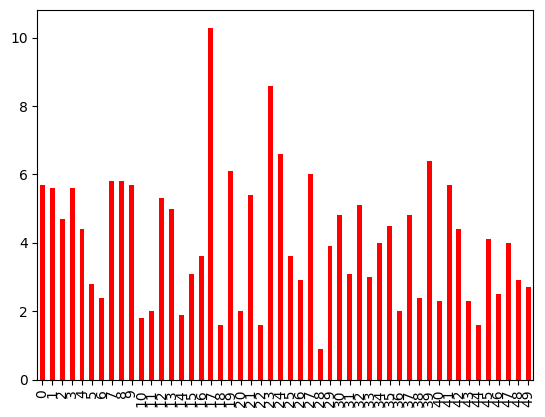

In [28]:
estado["Murder.Rate"].plot.bar(color="red")

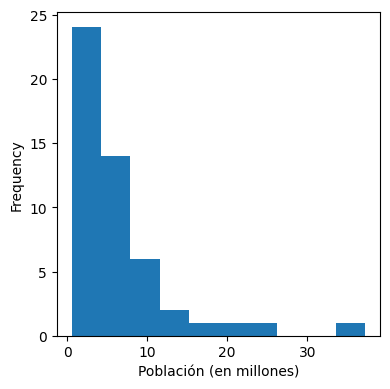

In [29]:
ax=(estado["Population"]/1000000).plot.hist(figsize=(4,4))
ax.set_xlabel("Población (en millones)")
plt.tight_layout()
plt.show()

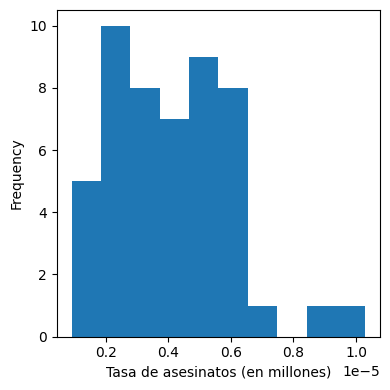

In [30]:
ax=(estado["Murder.Rate"]/1000000).plot.hist(figsize=(4,4))
ax.set_xlabel("Tasa de asesinatos (en millones)")
plt.tight_layout()
plt.show()

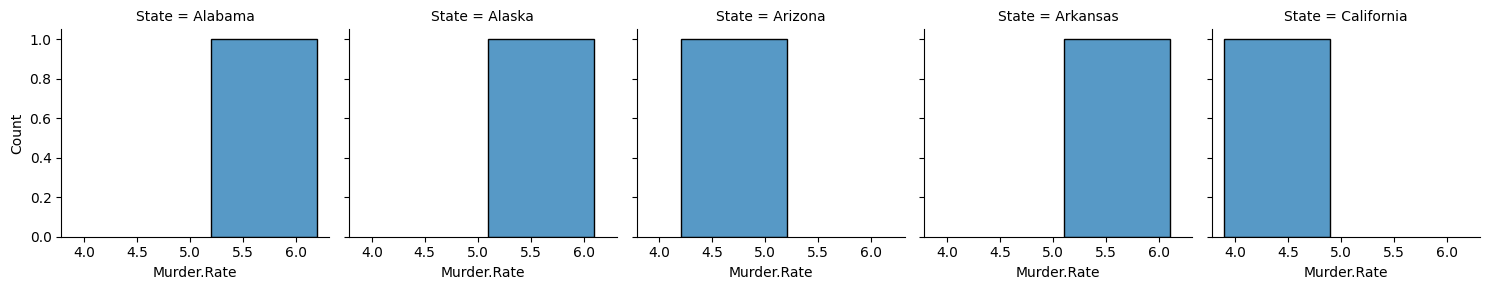

In [33]:
analisis=estado.head()
g=sns.FacetGrid(analisis, col="State")
g.map(sns.histplot, "Murder.Rate")